# Customer Segmentation Analysis

# 1. Download the dataset:

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


## 2. Load the dataset into the tool.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Below Visualizations.

# ∙ Univariate Analysis

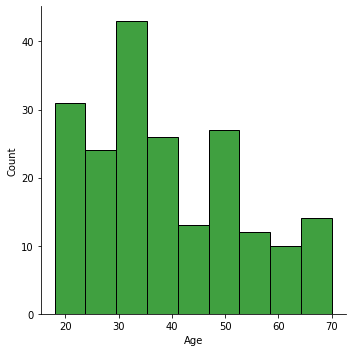

In [12]:
sns.displot(data["Age"], color='green')

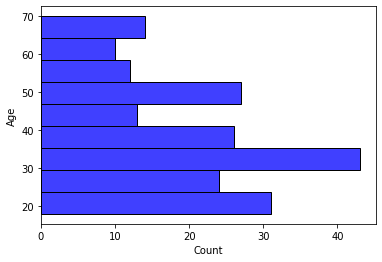

In [13]:
sns.histplot(y=data.Age,color='blue')

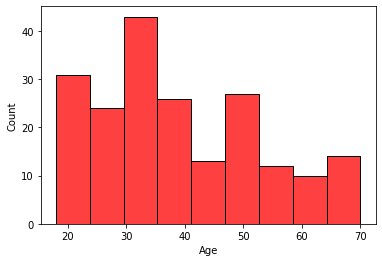

In [14]:
sns.histplot(x=data.Age,color='red')

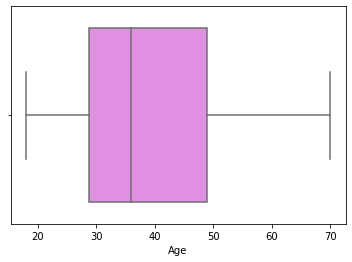

In [15]:
sns.boxplot(x=data.Age,color='violet')

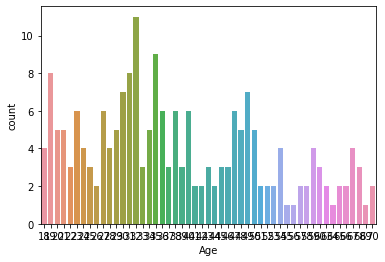

In [16]:
sns.countplot(x=data.Age)

# ∙ Bi- Variate Analysis

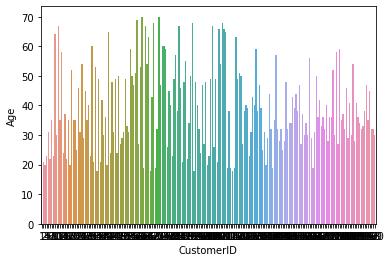

In [21]:
sns.barplot(x=data.CustomerID,y=data.Age)

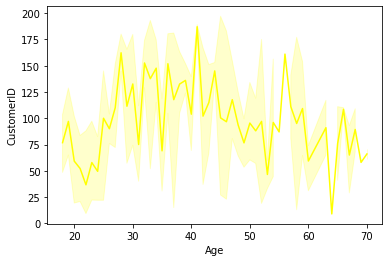

In [22]:
sns.lineplot(x=data.Age,y=data.CustomerID, color='yellow')

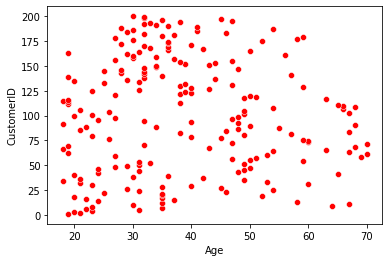

In [23]:
sns.scatterplot(x=data.Age,y=data.CustomerID,color='red')

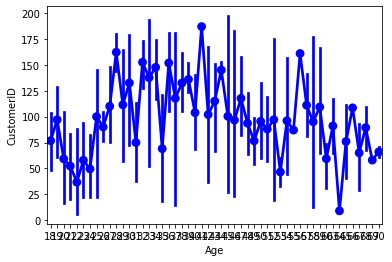

In [24]:
sns.pointplot(x=data.Age, y=data.CustomerID, color="blue")

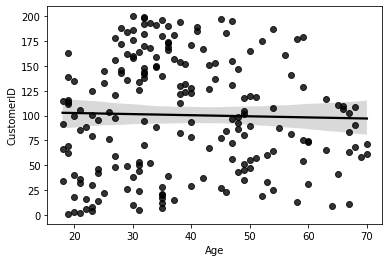

In [25]:
sns.regplot(x=data.Age,y=data.CustomerID,color='black')

# ∙ Multi-Variate Analysis

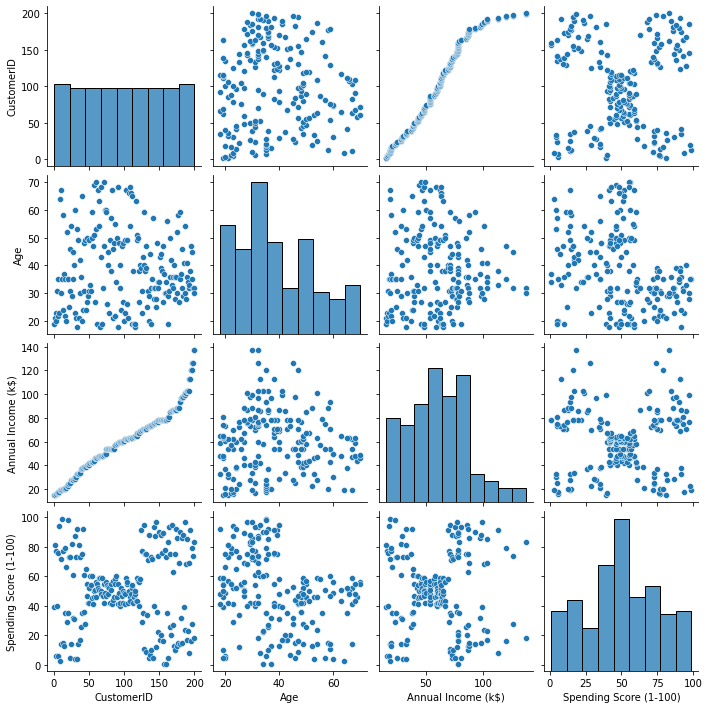

In [26]:
sns.pairplot(data=data[["CustomerID","Age","Annual Income (k$)","Spending Score (1-100)"]])

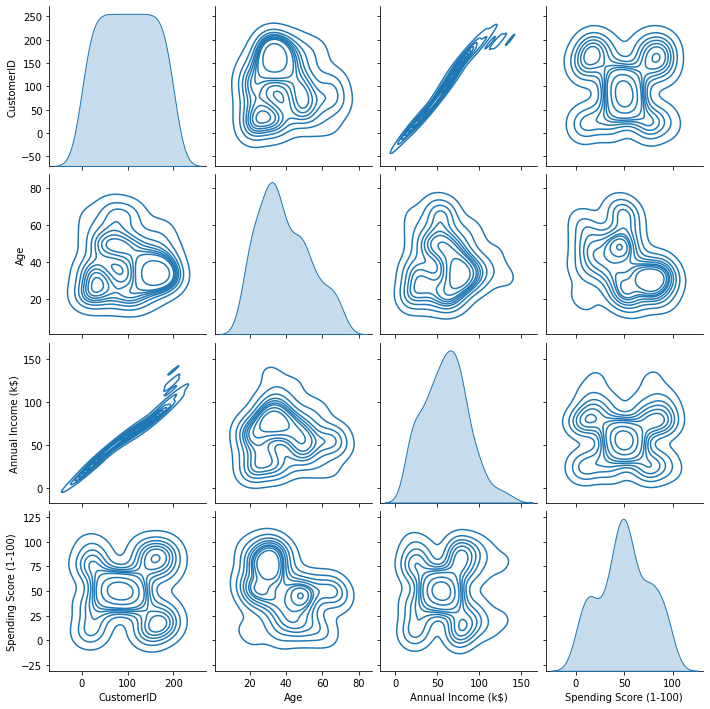

In [27]:
sns.pairplot(data=data[["CustomerID","Age","Annual Income (k$)","Spending Score (1-100)"]],kind="kde")

# 4. Perform descriptive statistics on the dataset.

In [28]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


# 5. Check for Missing values and deal with them.

In [29]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 6. Find the outliers and replace them outliers

In [30]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [31]:
a = data.Age.quantile(0.25)
b = data.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

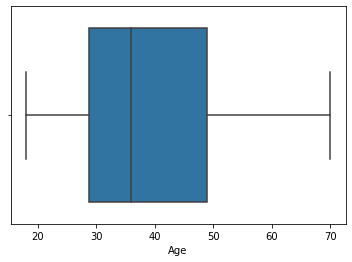

In [32]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

# 7. Check for Categorical columns and perform encoding.

In [33]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
data.Gender = lab.fit_transform(data.Gender)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# 8. Scaling the data

In [36]:
y = data["Gender"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

In [37]:
x=data.drop(columns=["Gender"],axis=1)
x.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [38]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980


# 9. Perform any of the clustering algorithms

In [39]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [40]:
X_Train.shape,X_Test.shape

((160, 4), (40, 4))

In [41]:
Y_Train.shape,Y_Test.shape

((160,), (40,))

In [42]:
X_Train.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
134,0.597565,-1.352802,0.474828,-1.754735
66,-0.580244,0.297832,-0.479408,-0.007764
26,-1.273073,0.441365,-1.242797,-0.706552
113,0.233830,-1.424569,0.131303,-0.163051
168,1.186470,-0.204535,1.009200,-0.900660


In [43]:
X_Test.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
18,-1.411639,0.943732,-1.433644,-0.823017
170,1.221111,0.082532,1.009200,-1.444162
107,0.129905,1.087265,0.093133,-0.163051
98,-0.025981,0.656665,0.016795,-0.318337
177,1.342356,-0.850435,1.047369,0.729845


In [44]:
Y_Train.head()

134    1
66     0
26     0
113    1
168    0
Name: Gender, dtype: int64

In [45]:
Y_Test.head()

18     1
170    1
107    1
98     1
177    1
Name: Gender, dtype: int64

In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [47]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [48]:
y_predict = model.predict(X_Test)

In [49]:
y_predict_train = model.predict(X_Train)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.98125


In [51]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.575


In [52]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1
Gender,,
0,15,5
1,12,8


In [53]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64        20
           1       0.62      0.40      0.48        20

    accuracy                           0.57        40
   macro avg       0.59      0.57      0.56        40
weighted avg       0.59      0.57      0.56        40

